In [1]:
import cv2

flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(len(flags))

print(flags)
print(flags[40])

346
['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'CO

In [2]:
import matplotlib.pyplot as plt
import numpy as np

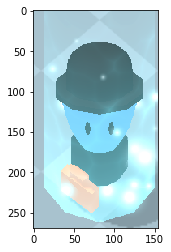

In [40]:
investor = cv2.imread('./template3.png')
plt.imshow(investor)
plt.show()

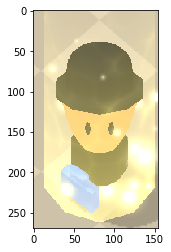

In [41]:
investor = cv2.cvtColor(investor, cv2.COLOR_BGR2RGB)
plt.imshow(investor)
plt.show()


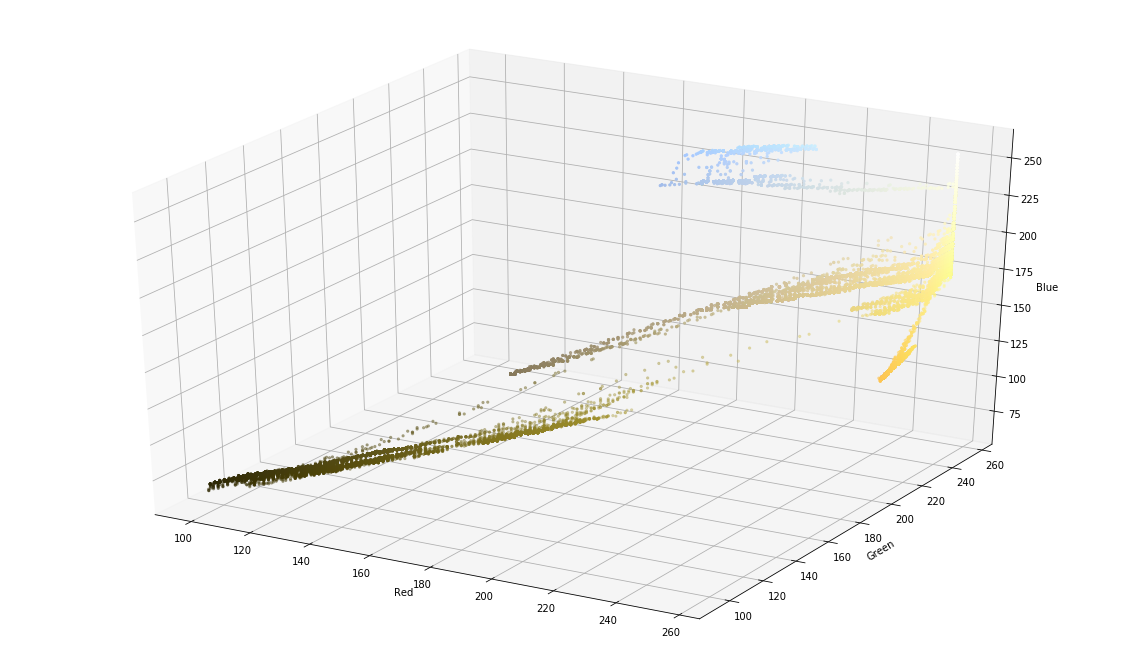

In [42]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

r, g, b = cv2.split(investor)
fig = plt.figure(figsize=(20, 12))
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = investor.reshape((np.shape(investor)[0]*np.shape(investor)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

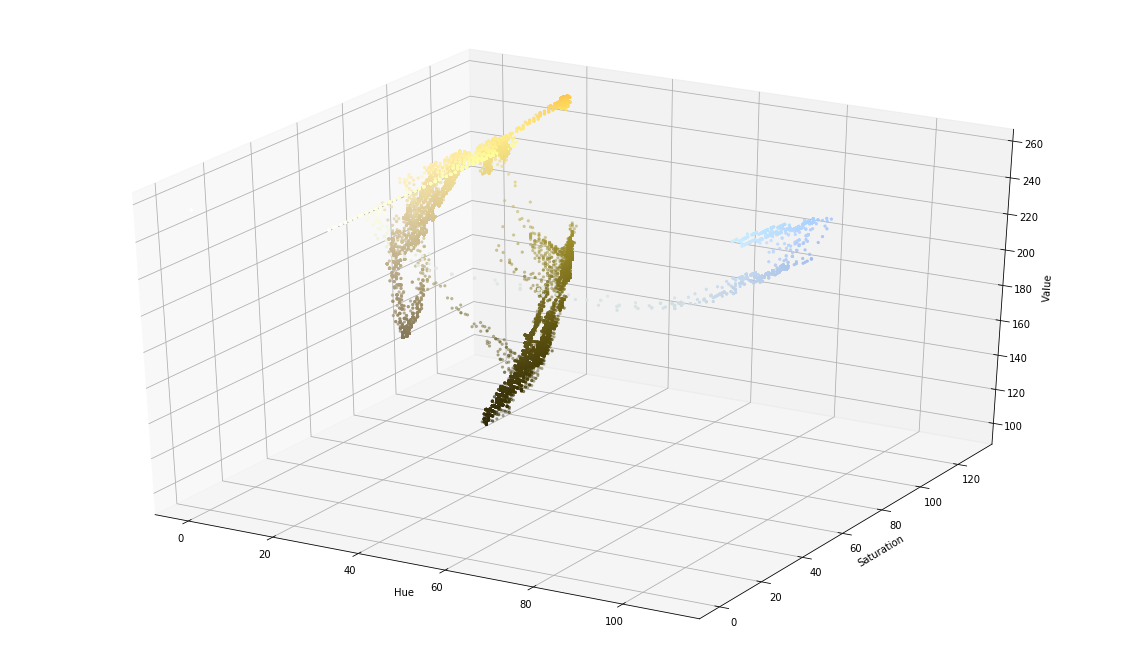

In [43]:
hsv_investor = cv2.cvtColor(investor, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_investor)
fig = plt.figure(figsize=(20, 12))
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [44]:
# bag_color = #c6d6f1 | 
# hat_color = #837a4d | #686448
# eye_color = #928a53
# cloth_color = #928a53 | #b4ab61 | #9e9556
# skin_color = #fed981 | #fede83 | #fee084

# RGB
bag_color = [(198, 214, 241)]
hat_eye_cloth_colors = [(131, 122, 77), (104, 100, 72), (146, 138, 83), (180, 171, 97), (158, 149, 86)]
skin_color = [(254, 217, 129), (254, 222, 131), (254, 224, 132)]

# HSV
#bag_color = [(218,18,95)]
#hat_eye_cloth_colors = [(50,41,51), (52,31,41), (52,43,57), (53,46,71), (52,46,62)]
#skin_color = [(42,49,100), (44,48,100), (45,48,100)]
#
#def convert_hsv_tuple_to_opencv_format(hsv_tuple):
#    h, s, v = hsv_tuple
#    s = int(s * 255.0 / 100.0)
#    v = int(v * 255.0 / 100.0)
#    return h, s, v
#
#bag_color_opencv = [convert_hsv_tuple_to_opencv_format(bag_color[0])]
#hat_eye_cloth_colors_opencv = [convert_hsv_tuple_to_opencv_format(color) for color in hat_eye_cloth_colors]
#skin_color_opencv = [convert_hsv_tuple_to_opencv_format(color) for color in skin_color]

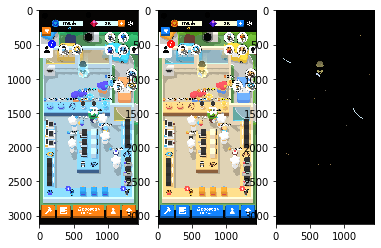

In [56]:
def create_mask_rgb(image, lower_color, upper_color):
    lower_bound = np.array(lower_color, dtype=np.uint8)
    upper_bound = np.array(upper_color, dtype=np.uint8)
    return cv2.inRange(image, lower_bound, upper_bound)

import time

# RGB
bag_color = [(198, 214, 241)]
hat_eye_cloth_colors = [(131, 122, 77), (104, 100, 72), (146, 138, 83), (180, 171, 97), (158, 149, 86)]
skin_color = [(254, 217, 129), (254, 222, 131), (254, 224, 132)]

image = cv2.imread("./image.png")
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

tolerance = 13

bag_mask = create_mask_rgb(rgb_image, [bag_color[0][0] - tolerance, bag_color[0][1] - tolerance, bag_color[0][2] - tolerance], [bag_color[0][0] + tolerance, bag_color[0][1] + tolerance, bag_color[0][2] + tolerance])

mask_list = []
for color in hat_eye_cloth_colors + skin_color:
    mask = create_mask_rgb(rgb_image, [color[0] - tolerance, color[1] - tolerance, color[2] - tolerance], [color[0] + tolerance, color[1] + tolerance, color[2] + tolerance])
    mask_list.append(mask)

combined_mask = bag_mask
for mask in mask_list:
    combined_mask = cv2.bitwise_or(combined_mask, mask)

# investor = cv2.imread('./template3.png')
result = cv2.bitwise_and(rgb_image, rgb_image, mask=combined_mask)

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.subplot(1, 3, 2)
plt.imshow(rgb_image)
plt.subplot(1, 3, 3)
plt.imshow(result)
plt.show()

In [1]:
import cv2
import numpy as np

def hex_to_bgr(hex_color):
    hex_color = hex_color.lstrip('#')
    bgr_color = tuple(int(hex_color[i:i+2], 16) for i in (4, 2, 0))
    return bgr_color

def bgr_to_hsv(bgr_color):
    bgr_array = np.uint8([[bgr_color]])
    hsv_array = cv2.cvtColor(bgr_array, cv2.COLOR_BGR2HSV)
    hsv_color = tuple(hsv_array[0][0])
    return hsv_color

def hex_to_hsv(hex_color):
    bgr_color = hex_to_bgr(hex_color)
    hsv_color = bgr_to_hsv(bgr_color)
    return hsv_color

In [33]:
cap = ['#696548', '#776F4B', '#8B8350', '#87804D']
# eyes = ['#958C53', '#9E975F']
# face = ['#FED681', '#FFD681', '#FED480', '#FFDC82', '#FFDB83', '#FFDE85', '#FEE789']
# body = ['#A2985A', '#A69C5A', '#AFA55F' '#B2A65E', '#A69D5A', '#B0A762']
# bag = ['#C3DFFE', '#C6D7F0', '#CFDDF1', '#C9D8F0', '#CDDDF0']

all_hex_colors = cap
all_hsv_colors = [hex_to_hsv(hex_color) for hex_color in all_hex_colors]
all_hsv_colors

[(26, 80, 105), (25, 94, 119), (26, 108, 139), (26, 110, 135)]

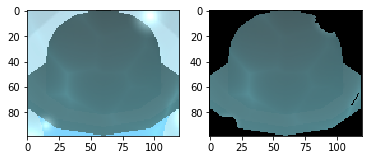

In [41]:
import matplotlib.pyplot as plt


def investor_mask_image(image, tolerance=15):
    # cap = ['#696548', '#776F4B', '#8B8350', '#87804D']
    # eyes = ['#958C53', '#9E975F']
    # face = ['#FED681', '#FFD681', '#FED480', '#FFDC82', '#FFDB83', '#FFDE85', '#FEE789']
    # body = ['#A2985A', '#A69C5A', '#AFA55F' '#B2A65E', '#A69D5A', '#B0A762']
    # bag = ['#C3DFFE', '#C6D7F0', '#CFDDF1', '#C9D8F0', '#CDDDF0']
    colors = [(26, 80, 105), (25, 94, 119), (26, 108, 139), (26, 110, 135)]
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    combined_mask = np.zeros_like(hsv_image[:, :, 0])

    for color in colors:
        lower_color = np.array(
            [max(color[0] - tolerance, 0), max(color[1] - tolerance, 0), max(color[2] - tolerance, 0)])
        upper_color = np.array([min(color[0] + tolerance, 180),
                                min(color[1] + tolerance, 255), min(color[2] + tolerance, 255)])

        mask = cv2.inRange(hsv_image, lower_color, upper_color)
        combined_mask = cv2.bitwise_or(combined_mask, mask)

    masked_image = cv2.bitwise_and(image, image, mask=combined_mask)
    return masked_image


im = cv2.imread('./image3.png')
masked_image = investor_mask_image(im)

plt.subplot(1, 2, 1)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.imshow(masked_image)
plt.show()


In [49]:
box = ['#FFE18B', '#AB7245', '#8C5E37', '#E8BB72', '#FED080', '#EFBE75']

all_hex_colors = box
all_hsv_colors = [hex_to_hsv(hex_color) for hex_color in all_hex_colors]
all_hsv_colors

[(22, 116, 255),
 (13, 152, 171),
 (14, 155, 140),
 (19, 130, 232),
 (19, 126, 254),
 (18, 130, 239)]

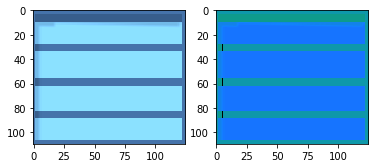

In [54]:
import matplotlib.pyplot as plt


def box_mask_image(image, tolerance=10):
    # box = ['#FFE18B', '#AB7245', '#8C5E37', '#E8BB72', '#FED080']
    colors = [(22, 116, 255),
              (13, 152, 171),
              (14, 155, 140),
              (19, 130, 232),
              (19, 126, 254),
              (18, 130, 239)]
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    combined_mask = np.zeros_like(hsv_image[:, :, 0])

    for color in colors:
        lower_color = np.array(
            [max(color[0] - tolerance, 0), max(color[1] - tolerance, 0), max(color[2] - tolerance, 0)])
        upper_color = np.array([min(color[0] + tolerance, 180),
                                min(color[1] + tolerance, 255), min(color[2] + tolerance, 255)])

        mask = cv2.inRange(hsv_image, lower_color, upper_color)
        combined_mask = cv2.bitwise_or(combined_mask, mask)

    masked_image = cv2.bitwise_and(hsv_image, hsv_image, mask=combined_mask)
    return masked_image


im = cv2.imread('../../matching_screenshots/box.png')
masked_image = box_mask_image(im)

plt.subplot(1, 2, 1)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.imshow(masked_image)
plt.show()
